In [15]:
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px 
import numpy as np 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler 
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [8]:
df = pd.read_csv("april_2018_sensor_data_archive.csv")
df

,sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value
0,40;SDS011;7;-1.298;36.791;2018-04-01T00:02:07....
1,40;SDS011;7;-1.298;36.791;2018-04-01T00:02:07....
2,40;SDS011;7;-1.298;36.791;2018-04-01T00:02:07....
3,40;SDS011;7;-1.298;36.791;2018-04-01T00:02:07....
4,43;SDS011;20;-1.253;36.854;2018-04-01T00:03:56...
...,...
165151,43;SDS011;20;-1.253;36.854;2018-04-30T23:56:39...
165152,40;SDS011;7;-1.298;36.791;2018-04-30T23:57:58....
165153,40;SDS011;7;-1.298;36.791;2018-04-30T23:57:58....
165154,40;SDS011;7;-1.298;36.791;2018-04-30T23:57:59....


In [3]:
new_cols = df.columns.str.split(";")

In [4]:
new_vals = df["sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value"].str.split(";", expand=True)

In [5]:
new_vals.shape, len(new_cols)

((165156, 8), 1)

In [9]:
new_cols

Index([['sensor_id', 'sensor_type', 'location', 'lat', 'lon', 'timestamp', 'value_type', 'value']], dtype='object')

In [11]:
df[['sensor_id', 'sensor_type', 'location',\
    'lat', 'lon', 'timestamp', 'value_type', 'value']] = new_vals

In [13]:
df = df.drop(columns='sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value')

In [14]:
df

,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value
0,40,SDS011,7,-1.298,36.791,2018-04-01T00:02:07.071983+00:00,humidity,65.80
1,40,SDS011,7,-1.298,36.791,2018-04-01T00:02:07.071983+00:00,temperature,21.10
2,40,SDS011,7,-1.298,36.791,2018-04-01T00:02:07.111462+00:00,P2,4.40
3,40,SDS011,7,-1.298,36.791,2018-04-01T00:02:07.111462+00:00,P1,7.80
4,43,SDS011,20,-1.253,36.854,2018-04-01T00:03:56.860816+00:00,humidity,76.30
...,...,...,...,...,...,...,...,...
165151,43,SDS011,20,-1.253,36.854,2018-04-30T23:56:39.987277+00:00,temperature,20.10
165152,40,SDS011,7,-1.298,36.791,2018-04-30T23:57:58.207062+00:00,P2,1.50
165153,40,SDS011,7,-1.298,36.791,2018-04-30T23:57:58.207062+00:00,P1,2.43
165154,40,SDS011,7,-1.298,36.791,2018-04-30T23:57:59.647288+00:00,humidity,73.20


In [25]:
df[df["value_type"] == "P2"]

,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value
2,40.0,SDS011,7.0,-1.298,36.791,2018-04-01T00:02:07.111462+00:00,P2,4.40
6,40.0,SDS011,7.0,-1.298,36.791,2018-04-01T00:04:36.364175+00:00,P2,4.43
8,40.0,SDS011,7.0,-1.298,36.791,2018-04-01T00:07:18.801040+00:00,P2,4.50
12,40.0,SDS011,7.0,-1.298,36.791,2018-04-01T00:09:55.795526+00:00,P2,4.87
18,40.0,SDS011,7.0,-1.298,36.791,2018-04-01T00:12:25.801304+00:00,P2,4.10
...,...,...,...,...,...,...,...,...
165132,40.0,SDS011,7.0,-1.298,36.791,2018-04-30T23:47:51.800680+00:00,P2,1.37
165136,40.0,SDS011,7.0,-1.298,36.791,2018-04-30T23:50:23.449791+00:00,P2,1.63
165142,40.0,SDS011,7.0,-1.298,36.791,2018-04-30T23:52:54.771506+00:00,P2,1.23
165146,40.0,SDS011,7.0,-1.298,36.791,2018-04-30T23:55:26.035408+00:00,P2,1.50


In [23]:

df[["value", "sensor_id", "location", "lat", "lon"]] = df[["value", "sensor_id", "location", "lat", "lon"]].astype(np.number)

C:\Users\Balogun Oladimeji\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\common.py:1636: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
C:\Users\Balogun Oladimeji\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\common.py:1636: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
C:\Users\Balogun Oladimeji\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\common.py:1636: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
C:\Users\Balogun Oladimeji\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\co

C:\Users\Balogun Oladimeji\AppData\Local\Temp\ipykernel_16052\558916320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sensor_id_group["value"].mean(), palette=["m", "g"]);
C:\Users\Balogun Oladimeji\AppData\Local\Temp\ipykernel_16052\558916320.py:3: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=sensor_id_group["value"].mean(), palette=["m", "g"]);


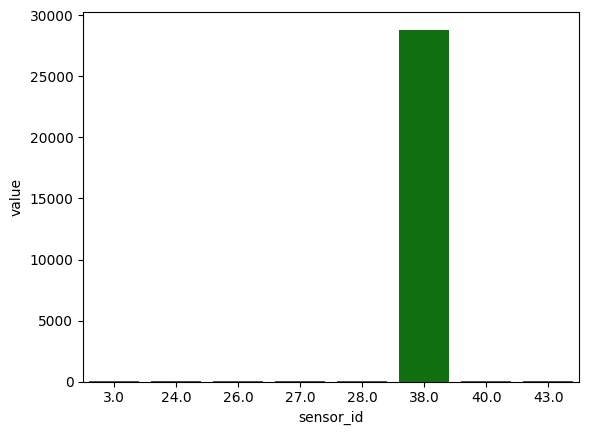

In [33]:
# let"s do some visualisations 
sensor_id_group = df.groupby("sensor_id")
sns.barplot(data=sensor_id_group["value"].mean(), palette=["m", "g"]);

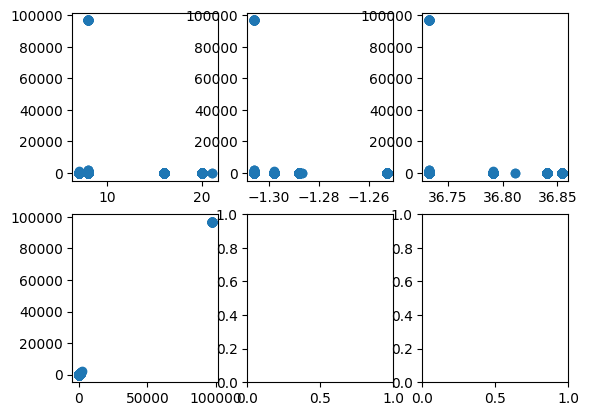

In [47]:
# investigate the numeric columns 
numeric_cols = df.select_dtypes(np.number).columns.tolist()
len(numeric_cols)

fig, axs = plt.subplots(2, 3)

for i in range(1, len(numeric_cols)): 
    axs = plt.subplot(2, 3, i)
    axs.scatter(x=df[numeric_cols[i]], y=df["value"])
    axs.set_title(f"{numeric_cols[i]} against price")

In [10]:
import pandas as pd

def wrangle(filename):
    # Load the data
    df = pd.read_csv(filename, sep=';')
    
    # Drop unnecessary columns
    # df.drop(columns=["sensor_id", "sensor_type", "location", "lat", "lon", "value_type", "value"], inplace=True)
    
    # Convert the 'timestamp' column to datetime format and set it as the index
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index("timestamp", inplace=True)
    
    # Localize and convert the index timezone
    # df.index = df.index.tz_localize("UTC").tz_convert("Africa/Nairobi")

    df = df[df["value_type"] == "P2"]
    df = df.drop(columns=["sensor_type"])
    
    return df

# Usage
df = wrangle("april_2018_sensor_data_archive.csv")


In [16]:
df.groupby("sensor_id")["value"].mean()

sensor_id
3     20.589962
27    13.578345
40     3.980814
43     3.952394
Name: value, dtype: float64

In [9]:
df["sensor_type"].nunique()

1

In [23]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [27]:
features = df.columns.tolist()[:-2]
target = "value"

In [29]:
# create the training test set and test set
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [32]:
# create the dumb model
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)

# check the accuracy of the dumb model against the dataset 
baseline_acc = mean_absolute_error(y_train, y_pred_baseline)

In [33]:
baseline_acc

9.684032825762388

In [55]:
model = make_pipeline(
    OneHotEncoder(), 
    MaxAbsScaler(),
    TruncatedSVD(), 
    Ridge()
)

In [56]:
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('maxabsscaler', MaxAbsScaler()),
                ('truncatedsvd', TruncatedSVD()), ('ridge', Ridge())])

In [58]:
preds = model.predict(X_train)
preds

array([11.296753  ,  3.99251408, 11.296753  , ..., 20.63352459,
       11.296753  ,  3.99251408])

In [59]:
preds_accuracy = mean_absolute_error(preds, y_train)
preds_accuracy

7.175112612130069

In [62]:
# cross validation 
scores = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5, scoring='r2', n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished


In [63]:
scores

array([0.0771745 , 0.09030278, 0.111151  , 0.07511377, 0.10861608])

In [68]:
model.score(X=X_train, y=y_train)

0.09071259876280546

In [70]:
# performance of the model on the test set 


ValueError: continuous is not supported